## SAFARIDINE & STAY: KENYA'S CULINARY AND LODGING NAVIGATOR

*Discover the Flavors of Kenya*

Welcome to SafariDine & Stay, where we bring you the ultimate culinary and lodging exploration in Kenya. Our platform includes two indispensable components:

1. **Flavors of Kenya: The Restaurant Recommender**
   - A recommender system that gives tourists the best match for their preferences in Kenya's vibrant culinary scene.

2. **Lodging Luxe: The Hotel Guide**
   - An invaluable hotel guide to help travelers find the perfect place to stay during their Kenyan adventure.

Together, these components create a comprehensive guide for travelers, ensuring unforgettable dining experiences and comfortable stays in the heart of Kenya


# Authors
- [Ivan Kibet]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/master')
- [Maurice Njogu]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/maurice')
- [Victor Mwatu]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/Victor')
- [Stanoff Kipkirui]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/Stanoff')
- [Martin Dudi]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/DUDI')
- [Peter Kariuki]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/Peter-Kariuki')

# INTRODUCTION
In the diverse culinary and hospitality landscape of Kenya, exploring the vibrant tapestry of flavors and finding the perfect place to stay is a journey in itself. Local and international travelers often face challenges planning a satisfying trip within their budget and time constraints. Kenya offers a rich array of culinary experiences and lodging options, from aromatic coastal dishes to cozy highland retreats. To ensure that every visitor's palate is delighted, and their stay is comfortable, we introduce "SafariDine & Stay: Kenya's Culinary and Lodging Navigator" – a tailored guide designed to match both local and international tourists' preferences with the finest dining experiences and accommodations in various towns in Kenya.

This innovative system harnesses the power of data and advanced machine learning algorithms to curate personalized recommendations for discerning travelers. By understanding individual tastes, budget considerations, and location preferences, SafariDine & Stay endeavors to elevate the dining and lodging experience, making each meal and night's stay an unforgettable adventure.

In this project, we embark on a journey to craft a seamless fusion of technology and gastronomy, and comfort. From data collection and model development to user interface design and continuous refinement, our goal is to create a user-centric platform that not only simplifies restaurant and hotel selection but also amplifies the joy of discovery. Through this endeavor, our primary goal as the 'SafariDine & Stay' group is to celebrate the diversity of Kenyan cuisine and hospitality and foster a deeper connection between travelers and the vibrant food culture and lodging options of this enchanting nation. Join us on this gastronomic and comfortable odyssey, as we endeavor to serve up the perfect plate and a cozy bed for every palate and traveler's dream.




# BUSINESS UNDERSTANDING
## PROBLEM STATEMENT
**Problem Description:**

In Kenya, where cultural diversity meets breathtaking landscapes, the rich culinary tapestry and diverse lodging options are hidden treasures. However, tourists, both local and international, often find themselves lost amidst the multitude of dining choices and unsure about where to stay. The absence of a personalized dining and lodging guide leads to missed opportunities to savor authentic Kenyan cuisines and experience comfortable stays.

This problem can be encapsulated as:

` Tourists in Kenya face the challenge of finding restaurants and hotels that align with their dining and lodging preferences, budget limitations, and desired locations. This results in subpar dining experiences and uncomfortable stays, ultimately hindering overall trip satisfaction. `

A Restaurant and Hotel Recommender System is a technology-driven solution designed to assist customers in finding dining establishments and lodging options that match their preferences and needs. It leverages data analysis and algorithms to suggest restaurants and hotels that align with the user's taste, location, budget, and style of cooking. This system enhances the dining and lodging experience for customers and can provide significant benefits to restaurant and hotel owners.

**Key Components:** A Restaurant and Hotel Recommender System typically comprises the following key components:

1. **User Profile:** Collects user data, including dining and lodging preferences, location, budget, and restaurant and hotel ratings.

2. **Restaurant and Hotel Databases:** Store information on various restaurants and hotels, including menus, cuisines, location, ratings, reviews, and pricing.

3. **Recommendation Engine:** Employs machine learning algorithms to analyze user profiles and restaurant and hotel data to generate personalized recommendations.

4. **User Interface:** Provides a user-friendly interface, such as a mobile app or website, for users to interact with the system.

**Business Benefits:** Implementing a Restaurant and Hotel Recommender System can offer several advantages for both customers and restaurant and hotel owners:

- **Improved Customer Experience:** Customers receive tailored restaurant and hotel recommendations based on their preferences, leading to higher satisfaction and loyalty.

- **Increased Revenue:** By suggesting relevant restaurants and promoting special offers, the system can drive more bookings and orders for both dining and lodging establishments.

- **Enhanced Operational Efficiency:** The system can optimize table allocation, predict demand, and manage room bookings, helping restaurants and hotels improve service quality and reduce wait times.

- **Data Insights:** Restaurants and hotels can gain valuable insights into customer preferences and behaviors, allowing for data-driven menu adjustments, marketing strategies, and room pricing.

**Target Audience:** The primary target audience for a Restaurant and Hotel Recommender System includes:

- **Travelers:** Individuals looking for restaurant and hotel suggestions based on their preferences for dining and lodging.

- **Restaurant and Hotel Owners/Managers:** Seeking to boost their customer base and operational efficiency in both dining and lodging services.

- **Marketers:** Interested in leveraging customer data for targeted promotions and campaigns to enhance both dining and lodging experiences.

**Challenges and Risks:** Some challenges and risks associated with implementing a Restaurant and Hotel Recommender System include the need for accurate data, algorithm bias, competition in the restaurant and hotel recommendation space, and ensuring data privacy.

**Future Opportunities:** Future opportunities for a Restaurant and Hotel Recommender System may include incorporating advanced AI and machine learning techniques, integrating with emerging technologies like augmented reality (AR), and expanding into international markets to offer dining and lodging recommendations worldwide.

In conclusion, SafariDine & Stay has the potential to revolutionize the dining and lodging experience for customers and boost the profitability of restaurants and hotels in Kenya. By leveraging data and technology, it can provide personalized recommendations that enhance customer satisfaction and drive business growth in both the culinary and lodging domains.



# DATA UNDERSTANDING

**Merging Restaurant and Hotel Data**

For SafariDine & Stay, we've combined two essential datasets to offer a complete travel experience in Kenya. We've seamlessly merged restaurant and hotel data to provide you with the best of both worlds. Whether you're looking for delectable dining options or comfortable accommodations, we've got you covered.

**Data Sources:**
The data used in this project has been sourced from two reputable platforms:

1. **TripAdvisor:** [TripAdvisor]('https://www.tripadvisor.in/') is a widely recognized platform for travel-related information and user reviews. The restaurant data in our dataset has been collected from TripAdvisor, ensuring that you receive insights based on real traveler experiences and ratings.

2. **Booking.com:** [Booking.com]('https://www.booking.com/') is a trusted platform for hotel bookings and reviews. The hotel data in our dataset has been sourced from Booking.com, offering you a selection of diverse hotels with real guest reviews and ratings.

**Column Descriptions for the Combined Dataset:**

1. `id`: A unique identifier for each establishment.
2. `category`: Indicates whether the entry is a restaurant or hotel.
3. `name`: The name of the restaurant or hotel.
4. `latitude`: The geographical latitude coordinates of the establishment.
5. `longitude`: The geographical longitude coordinates of the establishment.
6. `rating`: The average rating of the establishment based on user reviews.
7. `numberOfReviews`: The total number of reviews received by the establishment.
8. `lowerPrice`: The lower price range for dining or staying at the establishment.
9. `upperPrice`: The upper price range for dining or staying at the establishment.
10. `rawRanking`: A ranking score reflecting the establishment's popularity or quality.
11. `website`: The website URL for the restaurant or hotel (if available).
12. `cuisine`: The type of cuisine offered by the restaurant (for restaurants only).
13. `features`: Special features or amenities offered by the establishment.
14. `phone`: Contact phone number for inquiries or reservations.
15. `locationString`: The location description of the establishment.
16. `Town`: the location of the restaurant/hotel

In [55]:
#Importing relevant libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Ignore future deprecation warnings
warnings.filterwarnings("ignore")



In [2]:
data_files = ["Athi_river.csv","Bomet.csv","eldoret.csv","Gede_coast.csv","Kakamega_west.csv","Kericho.csv","Kiambu.csv","Kilifi.csv","kiserian.csv",
 "Kisumu.csv","Kitale.csv","Kitengela.csv","Kwale.csv","Lake Elementaita.csv","lake_nakuru_national_park.csv","Lamu.csv","Malindi.csv",
 "matuu.csv","mombasa.csv","mount_kenya_region.csv","Mtwapa_coast.csv","Nairobi.csv","Nanyuki.csv","Narok_rift.csv","ngong.csv","Nyahururu.csv","Nyeri.csv",
 "ruaka.csv","shela_Lamu.csv","siaya.csv","Ukunda_coast.csv","Watamu.csv"]

In [3]:
nairobi = pd.read_csv("datasets/Nairobi.csv")
hotels = pd.read_csv("hotels_data.csv")

In [4]:
list(nairobi.columns)

['address',
 'addressObj/city',
 'addressObj/country',
 'addressObj/postalcode',
 'addressObj/state',
 'addressObj/street1',
 'addressObj/street2',
 'ancestorLocations/0/abbreviation',
 'ancestorLocations/0/id',
 'ancestorLocations/0/name',
 'ancestorLocations/0/subcategory',
 'ancestorLocations/1/abbreviation',
 'ancestorLocations/1/id',
 'ancestorLocations/1/name',
 'ancestorLocations/1/subcategory',
 'ancestorLocations/2/abbreviation',
 'ancestorLocations/2/id',
 'ancestorLocations/2/name',
 'ancestorLocations/2/subcategory',
 'category',
 'cuisines/0',
 'cuisines/1',
 'cuisines/2',
 'cuisines/3',
 'cuisines/4',
 'cuisines/5',
 'cuisines/6',
 'cuisines/7',
 'cuisines/8',
 'cuisines/9',
 'cuisines/10',
 'cuisines/11',
 'cuisines/12',
 'cuisines/13',
 'cuisines/14',
 'description',
 'dietaryRestrictions/0',
 'dietaryRestrictions/1',
 'dietaryRestrictions/2',
 'dietaryRestrictions/3',
 'dietaryRestrictions/4',
 'dietaryRestrictions/5',
 'dishes/0',
 'dishes/1',
 'dishes/2',
 'dishes/3'

In [5]:
nairobi['ancestorLocations/0/name'].unique()

array(['Nairobi', 'Karen', 'Nairobi Region', 'Lavington', 'Ruaka',
       'Thika', 'Kahawa', 'Ongata Rongai', 'Langata', 'Mtito Andei',
       'Kiambu'], dtype=object)

In [6]:
# Specify the folder where your datasets are located
folder_path = 'datasets/'

# Get a list of CSV files in the folder
data_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create an empty list to store individual DataFrames
dfs = []

# Iterate through the list of CSV files and read each file into a DataFrame
for file in data_files:
    df = pd.read_csv(file, encoding='ISO-8859-1')  # Specify the encoding here
    # Add a 'source' column with the file name without the '.csv' extension
    df['source'] = os.path.splitext(os.path.basename(file))[0]
    dfs.append(df)

# Combine all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
# Define a function to combine columns starting with a specific prefix
def combine_columns(row, prefix):
    columns = [col for col in row.index if col.startswith(prefix)]
    return ', '.join(row[columns].dropna())

# Apply the function to create the 'cuisine', 'dishes', and 'features' columns
combined_df['cuisine'] = combined_df.apply(lambda x: combine_columns(x, 'cuisines'), axis=1)
combined_df['dishes'] = combined_df.apply(lambda x: combine_columns(x, 'dishes'), axis=1)
combined_df['features'] = combined_df.apply(lambda x: combine_columns(x, 'features'), axis=1)

# Reorder columns as per your requirement
desired_columns = ['id', 'name','latitude', 'longitude', 'rating', 'numberOfReviews', 'priceRange', 'rawRanking', 'website', 'cuisine', 'dishes', 'features', 'phone', 'rankingString', 'locationString','source']
combined_df = combined_df[desired_columns]

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13520\2493126161.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['cuisine'] = combined_df.apply(lambda x: combine_columns(x, 'cuisines'), axis=1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13520\2493126161.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['dishes'] = combined_df.apply(lambda x: combine_columns(x, 'dishes'), axis=1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13520\2493126161.py:27: PerformanceWarning: DataFrame i

In [7]:
data = pd.read_csv("combined_data.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3889 non-null   float64
 1   name             3883 non-null   object 
 2   latitude         3761 non-null   float64
 3   longitude        3802 non-null   float64
 4   rating           3436 non-null   float64
 5   numberOfReviews  3893 non-null   int64  
 6   priceRange       1298 non-null   object 
 7   rawRanking       3411 non-null   float64
 8   website          2780 non-null   object 
 9   cuisine          3292 non-null   object 
 10  dishes           970 non-null    object 
 11  features         2294 non-null   object 
 12  phone            3330 non-null   object 
 13  rankingString    2683 non-null   object 
 14  locationString   3701 non-null   object 
 15  source           3893 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory usage: 486.8+ KB


In [9]:
data.shape

(3893, 16)

In [10]:
duplicates = data[data.duplicated(subset='id')].sort_values(by='id', ascending=False)


In [11]:
data['locationString'].unique()

array(['Nairobi', 'Kitengela, Rift Valley Province', 'Karen, Nairobi',
       'Syokimau, Eastern Province', 'Athi River, Eastern Province',
       'Bomet, Rift Valley Province', 'Eldoret, Rift Valley Province',
       'Watamu, Coast Province', 'Malindi, Coast Province',
       'Kikambala, Coast Province',
       'Malindi Marine National Park, Coast Province',
       'Kakamega, Western Province', 'Kericho, Rift Valley Province',
       'Nairobi Region', 'Kiambu, Central Province', 'Lavington, Nairobi',
       'Thika, Central Province', 'Narok, Rift Valley Province',
       'Ruaka, Central Province', 'Nyeri, Central Province',
       'Langata, Nairobi', 'Kilifi, Coast Province',
       'Ngong, Rift Valley Province', 'Kiserian, Rift Valley Province',
       'Ongata Rongai, Rift Valley Province', 'Kahawa, Nairobi Region',
       'Mombasa, Coast Province', 'Shanzu, Mombasa, Coast Province',
       'Bamburi, Mombasa, Coast Province', 'Mtwapa, Coast Province',
       'Likoni, Coast Province',

In [12]:
data.head()

,id,name,latitude,longitude,rating,numberOfReviews,priceRange,rawRanking,website,cuisine,dishes,features,phone,rankingString,locationString,source
0,8557182.0,Imperial Lounge,-1.329460,36.873340,2.5,2,"KESÂ 29,647 - KESÂ 148,236",2.832928,NaN,"Italian, Indian, Contemporary",NaN,NaN,+254 770 496613,"#795 of 1,048 places to eat in Nairobi",Nairobi,Athi_river
1,19049362.0,Lazeez,-1.475289,36.962010,5.0,1,NaN,3.027515,http://Www.fb.com/lazeezkenya,NaN,NaN,NaN,+254 702 323594,#8 of 13 places to eat in Kitengela,"Kitengela, Rift Valley Province",Athi_river
2,14095423.0,Java House,-1.330040,36.924150,5.0,1,"KESÂ 22,235 - KESÂ 222,354",3.028487,http://www.javahouseafrica.com,Diner,NaN,NaN,+254 796 841537,#19 of 29 places to eat in Karen,"Karen, Nairobi",Athi_river
3,15319108.0,Bean Plant coffee and more,-1.332700,36.924313,3.5,12,NaN,3.028463,http://www.facebook.com/beanplantkenya/,"Cafe, European",NaN,"Seating, Wheelchair Accessible, Serves Alcohol...",+254 791 989342,"#627 of 1,048 places to eat in Nairobi",Nairobi,Athi_river
4,14140515.0,Java House Airport View,-1.330040,36.924150,3.0,9,"KESÂ 22,235 - KESÂ 222,354",2.977911,https://www.javahouseafrica.com/our-locations/,"Mexican, African, Cafe, Diner, Healthy",NaN,NaN,+254 746 622266,"#767 of 1,048 places to eat in Nairobi",Nairobi,Athi_river


# Data cleaning

In [13]:
data= data.drop_duplicates(subset=['id'])
data.reset_index(drop=True, inplace=True)

In [14]:
data.dropna(subset=['id','name'], inplace=True)


In [15]:
# Calculate the mean of the 'rating' column
mean_rating = data['rating'].mean()

# Fill missing ratings with the mean value
data['rating'].fillna(mean_rating, inplace=True)


In [16]:
# Calculate the median of the 'rawRanking' column
median_raw_ranking = data['rawRanking'].median()

# Fill missing 'rawRanking' values with the median
data['rawRanking'].fillna(median_raw_ranking, inplace=True)


In [17]:
# Fill missing 'website' values with 'No Website'
data['website'].fillna('No Website', inplace=True)


In [18]:
# Fill missing 'cuisine' values with 'Kenyan'
data['cuisine'].fillna('Kenyan', inplace=True)


In [19]:
# Remove the 'dishes' column
data.drop('dishes', axis=1, inplace=True)


In [20]:
# Fill missing values in 'features' column with 'seating'
data['features'].fillna('seating', inplace=True)
# Define a function to add 'seating' to the 'features' column if missing
def add_seating_feature(features):
    if pd.isnull(features):
        return 'seating'
    elif 'seating' not in features:
        return features + ', seating'
    else:
        return features

# Apply the function to the 'features' column
data['features'] = data['features'].apply(add_seating_feature)



In [21]:
# Replace missing phone numbers with "No Phone Number"
data['phone'].fillna('No Phone Number', inplace=True)


In [22]:
# Remove the 'Ranking string' column
data.drop('rankingString', axis=1, inplace=True)

In [23]:
data['locationString'].fillna('Diani Beach, Ukunda, Coast Province', inplace=True)


In [24]:
# Define a function to split the price range and keep the currency symbol
def split_price_range(price_range):
    if pd.notna(price_range):
        parts = price_range.split(' - ')
        if len(parts) == 2:
            lower_price = parts[0]
            upper_price = parts[1]
        else:
            lower_price = None
            upper_price = None
    else:
        lower_price = None
        upper_price = None
    return lower_price, upper_price

# Apply the function to the 'priceRange' col
data[['lowerPrice', 'upperPrice']] = data['priceRange'].apply(lambda x: pd.Series(split_price_range(x)))

# Remove leading and trailing whitespaces in the new columns
data['lowerPrice'] = data['lowerPrice'].str.strip()
data['upperPrice'] = data['upperPrice'].str.strip()



In [25]:
def clean_and_convert_values(value):
    if pd.notna(value):
        # Remove 'KESÂ', commas, and extra spaces
        cleaned_value = value.replace('KESÂ', '').replace('KES', '').replace(',', '').strip()
        
        # Check if the value has a dollar sign and remove it if present
        if '$' in cleaned_value:
            cleaned_value = cleaned_value.replace('$', '')
            # Convert to float and round to 2 decimal places
            return round(float(cleaned_value) * 148.75, 2)
        else:
            # Convert to float and round to 2 decimal places
            return round(float(cleaned_value), 2)
    else:
        return None

# Apply the function to the columns you want to clean and convert
columns_to_clean = ['lowerPrice', 'upperPrice']  # Replace with your column names
for column in columns_to_clean:
    data[column] = data[column].apply(clean_and_convert_values)

In [26]:
# Calculate the median for 'lowerPrice' and 'upperPrice' columns
median_lower_price = data['lowerPrice'].median()
median_upper_price = data['upperPrice'].median()

# Fill missing values with the respective medians
data['lowerPrice'].fillna(median_lower_price, inplace=True)
data['upperPrice'].fillna(median_upper_price, inplace=True)

In [27]:
# Check the column names first
print(data.columns)

# Rearrange the columns
data = data[['id', 'name', 'latitude', 'longitude', 'rating', 'numberOfReviews', 'lowerPrice', 'upperPrice', 'rawRanking', 'website', 'cuisine', 'features', 'phone', 'locationString','source']]

# Drop the 'priceRange' column if it still exists
if 'priceRange' in data.columns:
    data.drop('priceRange', axis=1, inplace=True)


Index(['id', 'name', 'latitude', 'longitude', 'rating', 'numberOfReviews',
       'priceRange', 'rawRanking', 'website', 'cuisine', 'features', 'phone',
       'locationString', 'source', 'lowerPrice', 'upperPrice'],
      dtype='object')


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 0 to 1474
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1468 non-null   float64
 1   name             1468 non-null   object 
 2   latitude         1353 non-null   float64
 3   longitude        1394 non-null   float64
 4   rating           1468 non-null   float64
 5   numberOfReviews  1468 non-null   int64  
 6   lowerPrice       1468 non-null   float64
 7   upperPrice       1468 non-null   float64
 8   rawRanking       1468 non-null   float64
 9   website          1468 non-null   object 
 10  cuisine          1468 non-null   object 
 11  features         1468 non-null   object 
 12  phone            1468 non-null   object 
 13  locationString   1468 non-null   object 
 14  source           1468 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 183.5+ KB


In [29]:
places_coordinates = {
    'Athi_river': {'latitude': -1.4621, 'longitude': 36.9710},
    'Bomet': {'latitude': -0.7793, 'longitude': 35.3414},
    'eldoret': {'latitude': 0.5143, 'longitude': 35.2698},
    'Gede_coast': {'latitude': -3.2627, 'longitude': 40.1003},
    'Kakamega_west': {'latitude': 0.2825, 'longitude': 34.7535},
    'Kiambu': {'latitude': -1.1700, 'longitude': 36.8356},
    'Kilifi': {'latitude': -3.6305, 'longitude': 39.8499},
    'kiserian': {'latitude': -1.4290, 'longitude': 36.9721},
    'Kisumu': {'latitude': -0.0917, 'longitude': 34.7676},
    'Kitale': {'latitude': 1.0222, 'longitude': 35.0059},
    'Kitengela': {'latitude': -1.4859, 'longitude': 36.9631},
    'Kwale': {'latitude': -4.1750, 'longitude': 39.4514},
    'Lake Elementaita': {'latitude': -0.7167, 'longitude': 36.2964},
    'lake_nakuru_national_park': {'latitude': -0.3567, 'longitude': 36.0800},
    'Lamu': {'latitude': -2.2711, 'longitude': 40.9020},
    'Malindi': {'latitude': -3.2175, 'longitude': 40.1195},
    'matuu': {'latitude': -1.2073, 'longitude': 37.8529},
    'Mount Kenya Region': {'latitude': -0.1597, 'longitude': 37.3036},
    'Nairobi': {'latitude': -1.2864, 'longitude': 36.8172},
    'Nanyuki': {'latitude': 0.0249, 'longitude': 37.0694},
    'Narok_rift': {'latitude': -1.0994, 'longitude': 35.8617},
    'ngong': {'latitude': -1.3596, 'longitude': 36.6590},
    'Nyahururu': {'latitude': -0.0294, 'longitude': 36.1521},
    'Nyeri': {'latitude': -0.4270, 'longitude': 36.9400},
    'ruaka': {'latitude': -1.1971, 'longitude': 36.7666},
    'siaya': {'latitude': 0.0607, 'longitude': 34.2881},
    'thika': {'latitude': -1.0394, 'longitude': 37.0872},
    'Ukunda_coast': {'latitude': -4.2899, 'longitude': 39.5762},
    'Watamu': {'latitude': -3.3669, 'longitude': 40.0175}
}

In [30]:
#Function to fill missing coordinates based on area name
def fill_missing_latitudes(row):
    area_name = row['source']
    if pd.isna(row['latitude']):
        if area_name in places_coordinates:
            row['latitude'] = places_coordinates[area_name]['latitude']
    return row

# Apply the fill_missing_latitudes function to the DataFrame
data = data.apply(fill_missing_latitudes, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 0 to 1474
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1468 non-null   float64
 1   name             1468 non-null   object 
 2   latitude         1468 non-null   float64
 3   longitude        1394 non-null   float64
 4   rating           1468 non-null   float64
 5   numberOfReviews  1468 non-null   int64  
 6   lowerPrice       1468 non-null   float64
 7   upperPrice       1468 non-null   float64
 8   rawRanking       1468 non-null   float64
 9   website          1468 non-null   object 
 10  cuisine          1468 non-null   object 
 11  features         1468 non-null   object 
 12  phone            1468 non-null   object 
 13  locationString   1468 non-null   object 
 14  source           1468 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 183.5+ KB


In [31]:
def fill_missing_longitude(row):
    area_name = row['source']
    if pd.isna(row['longitude']):
        if area_name in places_coordinates:
            row['longitude'] = places_coordinates[area_name]['longitude']
    return row

# Apply the fill_missing_latitudes function to the DataFrame
data = data.apply(fill_missing_longitude, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 0 to 1474
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1468 non-null   float64
 1   name             1468 non-null   object 
 2   latitude         1468 non-null   float64
 3   longitude        1468 non-null   float64
 4   rating           1468 non-null   float64
 5   numberOfReviews  1468 non-null   int64  
 6   lowerPrice       1468 non-null   float64
 7   upperPrice       1468 non-null   float64
 8   rawRanking       1468 non-null   float64
 9   website          1468 non-null   object 
 10  cuisine          1468 non-null   object 
 11  features         1468 non-null   object 
 12  phone            1468 non-null   object 
 13  locationString   1468 non-null   object 
 14  source           1468 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 183.5+ KB


In [32]:
hotels.head()

,id,category,name,latitude,longitude,rating,numberOfReviews,lowerPrice,upperPrice,rawRanking,website,cuisine,features,phone,locationString,source
0,7043952,hotel,Ocean View Nyali Boutique Hotel,-4.024306,39.724350,3.0,31,2965.0,4002.0,2.913853,NaN,NaN,"Wifi, Pool, Internet, Kids Activities, Room se...",+254 728 555237,"Mombasa, Coast Province",Mombasa
1,10410833,hotel,The Shaza,-3.966389,39.757780,4.0,75,20308.0,23570.0,3.256764,https://www.facebook.com/103727439013837/,NaN,"Pool, Suites, Room service, Free Internet, Fre...",+254 799 213821,"Mombasa, Coast Province",Mombasa
2,1786990,hotel,Tembo Village Resort Watamu,-3.351200,40.017815,4.0,122,3706.0,5929.0,3.204357,http://www.tembovillage.com,NaN,"Pool, Restaurant, Internet, Suites, Room servi...",+254 721 980840,"Watamu, Coast Province",Watamu
3,17426361,hotel,Lemon Valley Farm Estate,-0.377193,36.250750,4.0,10,12155.0,16158.0,3.114480,https://lemonvalley.co.ke/,NaN,"Pool, Kids Activities, Suites, Room service, F...",+254 720 879139,"Nakuru, Rift Valley Province",Nakuru
4,20155481,hotel,Merinja Guesthouse,-0.725660,36.436530,5.0,4,8449.0,11266.0,3.104138,https://www.facebook.com/pages/category/Hotel/...,NaN,NaN,+254 727 534847,"Naivasha, Rift Valley Province",Naivasha


In [33]:
data['id']= data['id'].astype('int64')

In [34]:
hotels.dropna(subset=['latitude','longitude'], inplace=True)

In [35]:
# Calculate the mean of the 'rating' column
mean_rating2 = hotels['rating'].mean()

# Fill missing ratings with the mean value
hotels['rating'].fillna(mean_rating2, inplace=True)

In [36]:
# Calculate the median of the 'rawRanking' column
median_raw_ranking2 = hotels['rawRanking'].median()

# Fill missing 'rawRanking' values with the median
hotels['rawRanking'].fillna(median_raw_ranking2, inplace=True)

In [37]:
# Fill missing 'website' values with 'No Website'
hotels['website'].fillna('No Website', inplace=True)

In [38]:
# Fill missing 'cuisine' values with 'Kenyan'
hotels['cuisine'].fillna('N/A', inplace=True)

In [39]:
# Fill missing values in 'features' column with 'seating'
hotels['features'].fillna('Room service,Free Internet, Free parking,Restaurant,Bar/Lounge' , inplace=True)

In [40]:
# Replace missing phone numbers with "No Phone Number"
hotels['phone'].fillna('No Phone Number', inplace=True)

In [41]:
# Fill missing 'source' values with the first value from 'locationString'
hotels['source'].fillna(hotels['locationString'].str.split(',').str[0], inplace=True)


In [42]:
data['category']='restaurant'

In [43]:
data = data[['id',
 'category',
 'name',
 'latitude',
 'longitude',
 'rating',
 'numberOfReviews',
 'lowerPrice',
 'upperPrice',
 'rawRanking',
 'website',
 'cuisine',
 'features',
 'phone',
 'locationString',
 'source']]

In [44]:
data.info()
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 0 to 1474
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1468 non-null   int64  
 1   category         1468 non-null   object 
 2   name             1468 non-null   object 
 3   latitude         1468 non-null   float64
 4   longitude        1468 non-null   float64
 5   rating           1468 non-null   float64
 6   numberOfReviews  1468 non-null   int64  
 7   lowerPrice       1468 non-null   float64
 8   upperPrice       1468 non-null   float64
 9   rawRanking       1468 non-null   float64
 10  website          1468 non-null   object 
 11  cuisine          1468 non-null   object 
 12  features         1468 non-null   object 
 13  phone            1468 non-null   object 
 14  locationString   1468 non-null   object 
 15  source           1468 non-null   object 
dtypes: float64(6), int64(2), object(8)
memory usage: 195.0+ KB
<class

In [45]:
# Combine the datasets
final_data = pd.concat([data, hotels], ignore_index=True)

# Check the info of the combined dataset
final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5442 non-null   int64  
 1   category         5442 non-null   object 
 2   name             5442 non-null   object 
 3   latitude         5442 non-null   float64
 4   longitude        5442 non-null   float64
 5   rating           5442 non-null   float64
 6   numberOfReviews  5442 non-null   int64  
 7   lowerPrice       5442 non-null   float64
 8   upperPrice       5442 non-null   float64
 9   rawRanking       5442 non-null   float64
 10  website          5442 non-null   object 
 11  cuisine          5442 non-null   object 
 12  features         5442 non-null   object 
 13  phone            5442 non-null   object 
 14  locationString   5442 non-null   object 
 15  source           5442 non-null   object 
dtypes: float64(6), int64(2), object(8)
memory usage: 680.4+ KB


In [46]:
duplicate = final_data[final_data.duplicated(subset='id')].sort_values(by='id', ascending=False)
duplicate

,id,category,name,latitude,longitude,rating,numberOfReviews,lowerPrice,upperPrice,rawRanking,website,cuisine,features,phone,locationString,source


In [48]:
#Define the corrected coordinates
corrections_coordinates = {
    'Eldorado Rustic Hotel': {'latitude': -0.3567, 'longitude': 36.0800},
    'Mayungu Beach Bar & Restaurant': {'latitude': -3.2175, 'longitude': 40.1195},
    'Grand Tenacity Hotel': {'latitude': 1.0222, 'longitude': 35.0059},
    'Sarova Stanley': {'latitude': -1.2864, 'longitude': 36.8172},
    'Le Blossom Chinese restaurant':{'latitude': -1.2864, 'longitude': 36.8172},
    'Inkaba Hotel & Conference Centre':{'latitude': -3.6305, 'longitude': 39.8499}
}

In [49]:
for hotel, coords in corrections_coordinates.items():
    final_data.loc[final_data['name'] == hotel, ['longitude', 'latitude']] = coords['longitude'], coords['latitude']

# EXPLORATORY DATA ANALYSIS

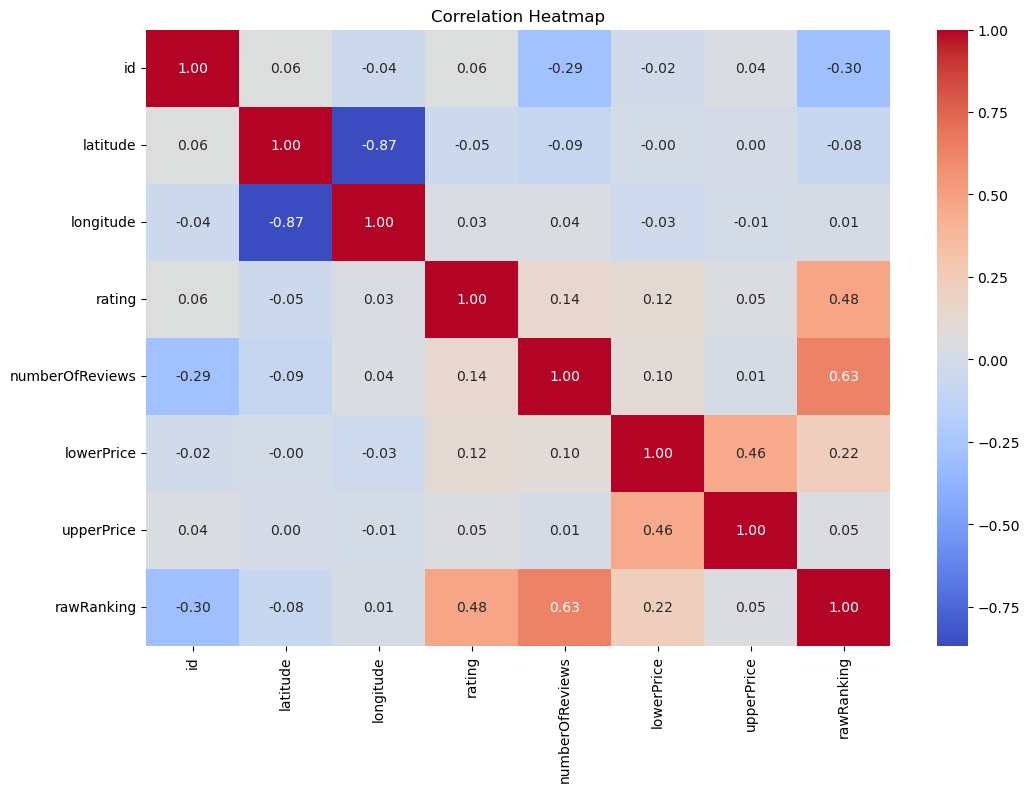

In [53]:
#Heat map showing correlation between variables
numerical_columns = final_data.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['rawRanking', 'numberOfReviews']]

# Add a constant term for the intercept
X['const'] = 1

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

          Variable         VIF
0       rawRanking    1.496523
1  numberOfReviews    1.496523
2            const  145.419459


**Explanation** 
- The correlation values show low corelation between variables in the final data, though there exists a modelately strong correlation between 'rawRanking' and numberOfReviews. However, the variance inflation factor value of 1.5 between these variables implies that they have little to no multicolinearity. Thus, we can say that 'rawRanking' and 'numberOfReviews' are related, but one variable does not directly causes the other to change.